In [2]:
import numpy as np
from scipy.stats import norm, uniform
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from operator import itemgetter
import emcee

# Symmerty

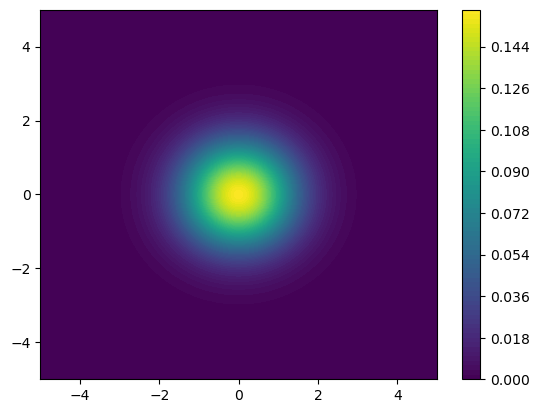

In [60]:
Vol = np.trapz(np.trapz(Z, x), y)

def density_pdf(x, y, mu, sigma):
    return density(x, y, mu, sigma)/ Vol

Zd = density_pdf(X, Y, mu, sigma)

plt.contourf(X, Y, Zd, 100)
plt.colorbar()
plt.show()

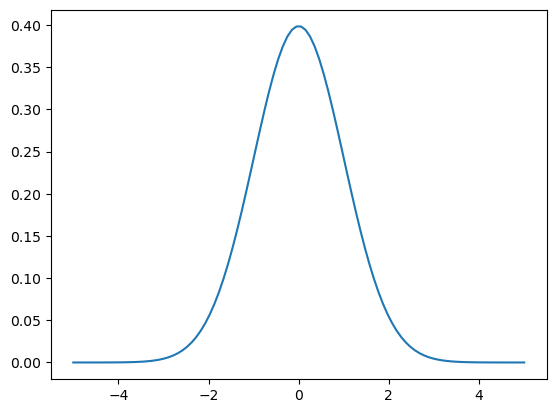

0.9999999999999998

In [61]:
# marginalized over y
Zdx = np.trapz(Zd, y)

plt.plot(x, Zdx)
plt.show()

# Area
np.trapz(Zdx, x)


In [62]:
density_x = interp1d(x, Zdx, kind='cubic')

density_x(0.5)

array(0.35206539)

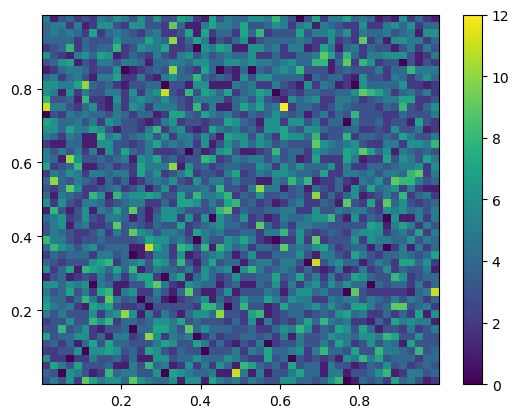

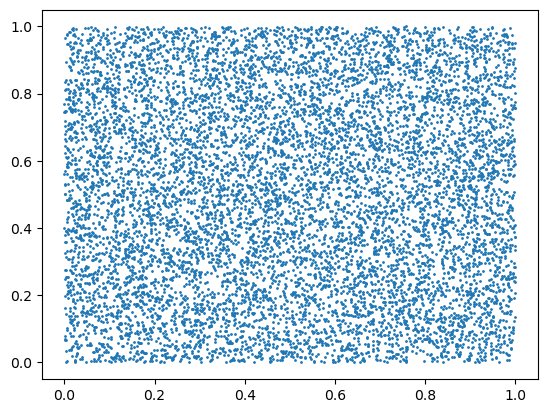

In [63]:
x_rand = np.random.uniform(0, 1, 10000)
y_rand = np.random.uniform(0, 1, 10000)

plt.hist2d(x_rand, y_rand, bins=50)
plt.colorbar()
plt.show()

plt.scatter(x_rand, y_rand, s=1)
plt.show()


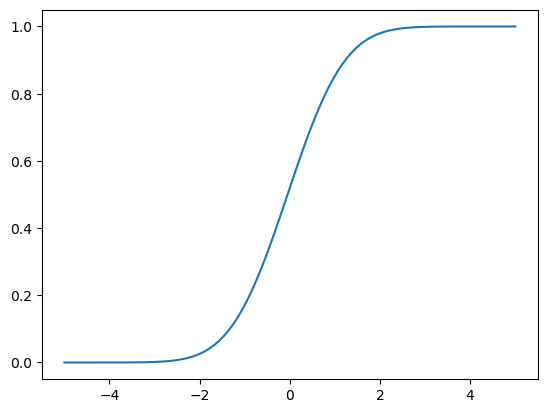

In [64]:
cdf_x = np.cumsum(Zdx)
cdf_x = cdf_x / cdf_x[-1]
plt.plot(x, cdf_x)

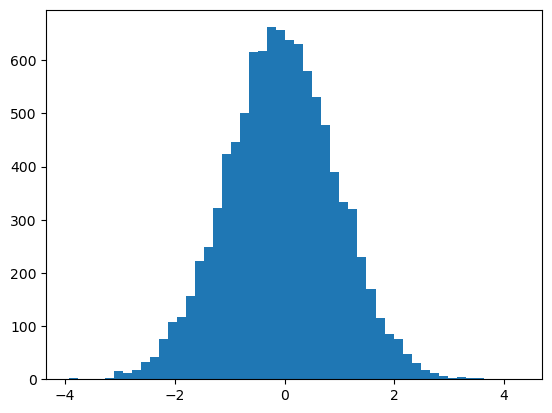

In [65]:
invers_cdf_x = interp1d(cdf_x, x, kind='cubic')

x_t = invers_cdf_x(x_rand)

plt.hist(x_t, bins=50)
plt.show()

In [66]:
xs, ys = [], []
for xx, yy in zip(x_rand, y_rand):
    x_t = invers_cdf_x(xx)
    ZZ = density_pdf(x_t, y, 0, 1)
    cdf_y = np.cumsum(ZZ)
    cdf_y = cdf_y / cdf_y[-1]
    invers_cdf_y = interp1d(cdf_y, y, kind='cubic')
    y_t = invers_cdf_y(yy)
    xs.append(x_t)
    ys.append(y_t)

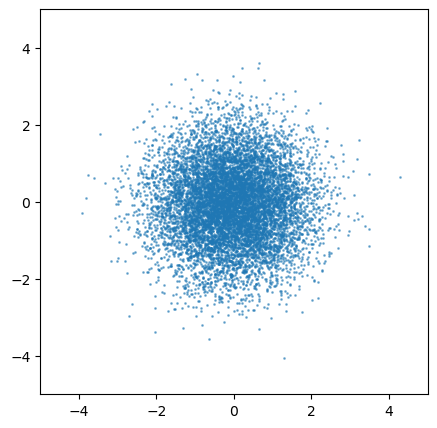

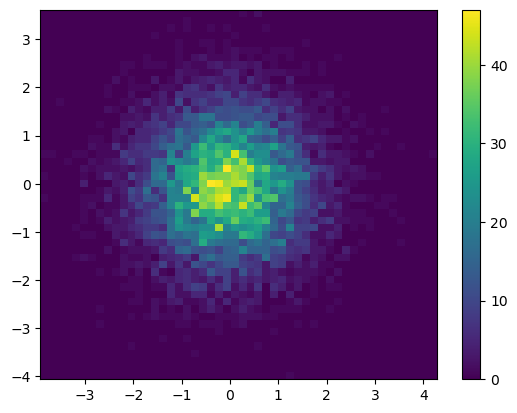

In [68]:
plt.figure(figsize=(5,5))
plt.scatter(xs, ys, s=1, alpha=0.5)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

# heatmap
plt.hist2d(xs, ys, bins=50)
plt.colorbar()
plt.show()

# Asymmetric

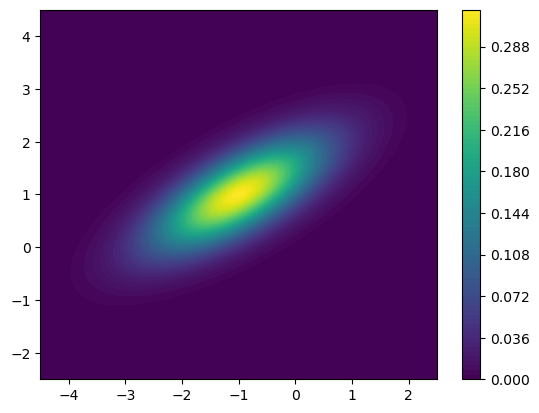

In [94]:
def density(x, y, mu_x, mu_y, sigma_x, sigma_y, b):
    muy = mu_y + b * (x - mu_x)
    Amp = norm.pdf(x, mu_x, sigma_x)
    return norm.pdf(y, muy, sigma_y) * Amp

mu_x = -1
mu_y = 1
sigma_x = 1
sigma_y = 0.5
b = 0.5
x = np.linspace(-4.5, 2.5, 100)
y = np.linspace(-2.5, 4.5, 100)
X, Y = np.meshgrid(x, y)
Z = density(X, Y, mu_x, mu_y, sigma_x, sigma_y, b)

plt.contourf(X, Y, Z, 100)
plt.colorbar()
plt.show()

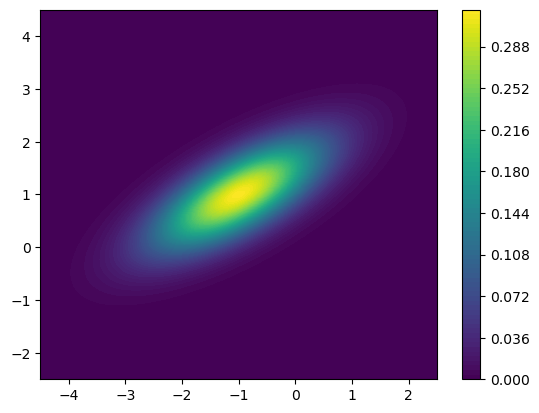

In [95]:
Vol = np.trapz(np.trapz(Z, x), y)

def density_pdf(x, y, mu_x, mu_y, sigma_x, sigma_y, b):
    return density(x, y, mu_x, mu_y, sigma_x, sigma_y, b)/ Vol

Zd = density_pdf(X, Y, mu_x, mu_y, sigma_x, sigma_y, b)

plt.contourf(X, Y, Zd, 100)
plt.colorbar()
plt.show()

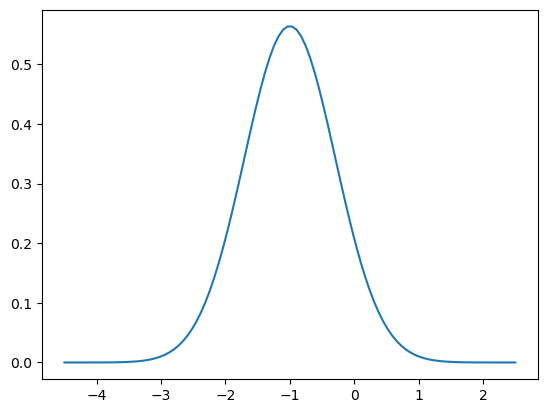

1.0

In [96]:
# marginalized over y
Zdx = np.trapz(Zd, y)

plt.plot(x, Zdx)
plt.show()

# Area
np.trapz(Zdx, x)


In [97]:
density_x = interp1d(x, Zdx, kind='cubic')

density_x(0.5)

array(0.05935287)

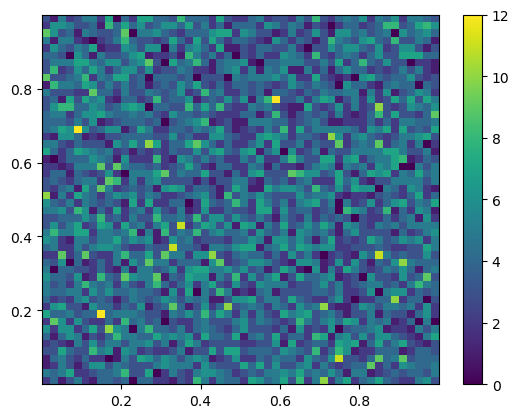

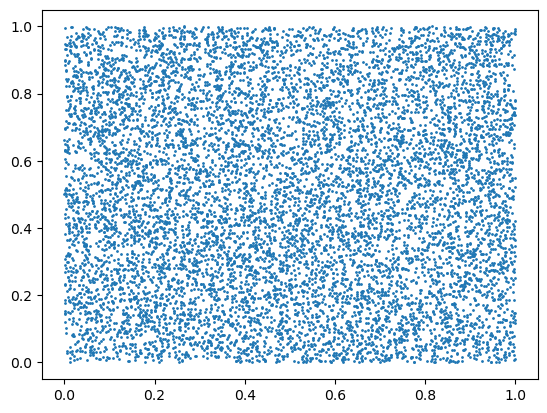

In [98]:
x_rand = np.random.uniform(0, 1, 10000)
y_rand = np.random.uniform(0, 1, 10000)

plt.hist2d(x_rand, y_rand, bins=50)
plt.colorbar()
plt.show()

plt.scatter(x_rand, y_rand, s=1)
plt.show()


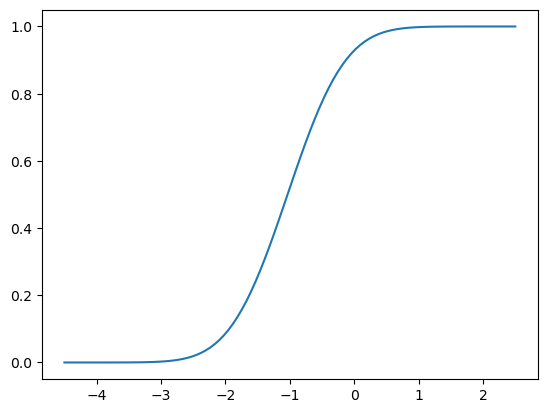

In [99]:
cdf_x = np.cumsum(Zdx)
cdf_x = cdf_x / cdf_x[-1]
plt.plot(x, cdf_x)

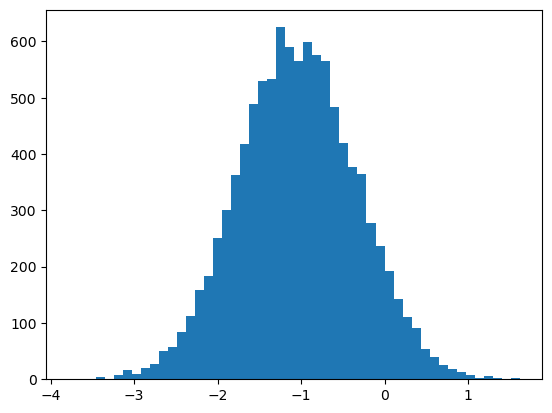

In [100]:
invers_cdf_x = interp1d(cdf_x, x, kind='cubic')

x_t = invers_cdf_x(x_rand)

plt.hist(x_t, bins=50)
plt.show()

In [104]:
xs, ys = [], []
for xx, yy in zip(x_rand, y_rand):
    x_t = invers_cdf_x(xx)
    ZZ = density_pdf(x_t, y, mu_x, mu_y, sigma_x, sigma_y, b)
    cdf_y = np.cumsum(ZZ)
    cdf_y = cdf_y / cdf_y[-1]
    cdf_y_unique = np.unique(cdf_y)
    invers_cdf_y = interp1d(cdf_y_unique, y[:len(cdf_y_unique)], kind='cubic')
    y_t = invers_cdf_y(yy)
    xs.append(x_t)
    ys.append(y_t)

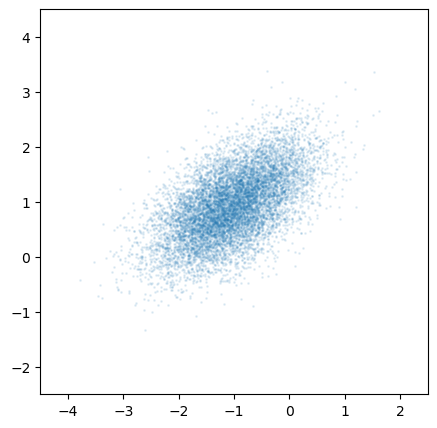

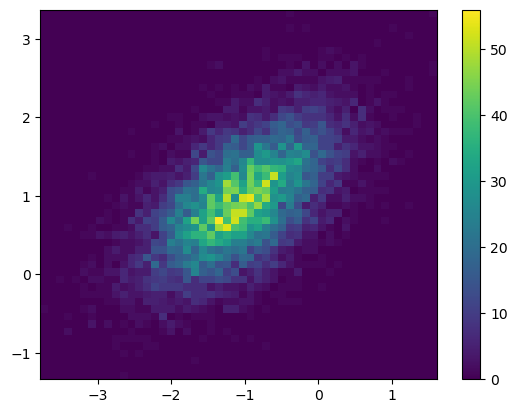

In [107]:
plt.figure(figsize=(5,5))
plt.scatter(xs, ys, s=1, alpha=0.1)
plt.xlim(-4.5, 2.5)
plt.ylim(-2.5, 4.5)
plt.show()

# heatmap
plt.hist2d(xs, ys, bins=50)
plt.colorbar()
plt.show()

# 3D

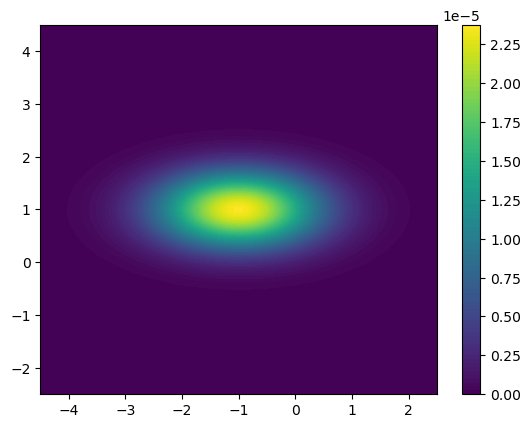

In [2]:
def density(x, y, z, mu_x, mu_y, mu_z, sigma_x, sigma_y, sigma_z):
    return norm.pdf(x, mu_x, sigma_x) * norm.pdf(y, mu_y, sigma_y) * norm.pdf(z, mu_z, sigma_z)

mu_x = -1
mu_y = 1
mu_z = 0
sigma_x = 1
sigma_y = 0.5
sigma_z = 0.8

x = np.linspace(-4.5, 2.5, 100)
y = np.linspace(-2.5, 4.5, 100)
z = np.linspace(-3.5, 3.5, 100)
X, Y, Z = np.meshgrid(x, y, z)

W = density(X, Y, Z, mu_x, mu_y, mu_z, sigma_x, sigma_y, sigma_z)

plt.contourf(X[:, :, 2], Y[:, :, 2], W[:, :, 2], 100)
plt.colorbar()
plt.show()

0.9995199030305478


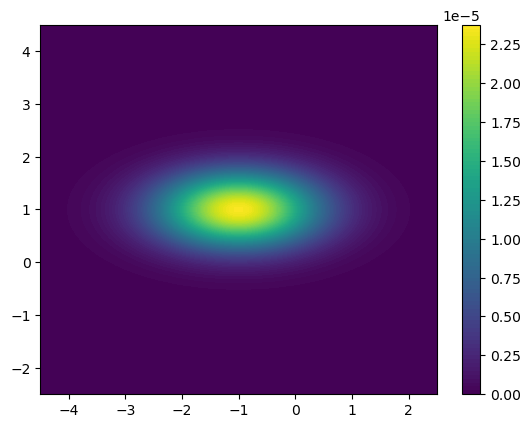

In [3]:
hyperVol = np.trapz(np.trapz(np.trapz(W, x), y), z)
print(hyperVol)

def density_pdf(x, y, z, mu_x, mu_y, mu_z, sigma_x, sigma_y, sigma_z):
    return density(x, y, z, mu_x, mu_y, mu_z, sigma_x, sigma_y, sigma_z)/ hyperVol

Wd = density_pdf(X, Y, Z, mu_x, mu_y, mu_z, sigma_x, sigma_y, sigma_z)

plt.contourf(X[:, :, 2], Y[:, :, 2], Wd[:, :, 2], 100)
plt.colorbar()
plt.show()


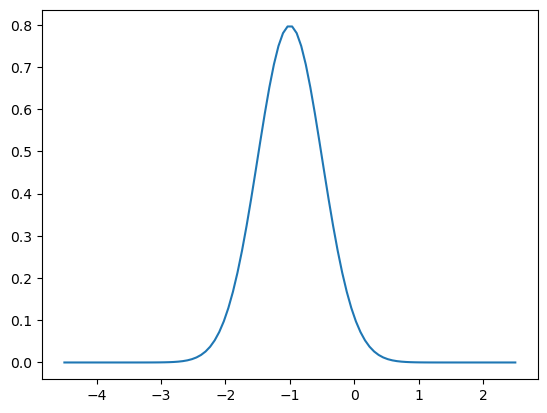

0.9999999999999999

In [14]:
# marginalized over y and z
Wx = np.trapz(np.trapz(Wd, z), y)

plt.plot(x, Wx)
plt.show()

# Area
np.trapz(Wx, x)

In [15]:
density_x = interp1d(x, Wx, kind='cubic')

density_x(0.5)

array(0.0088635)

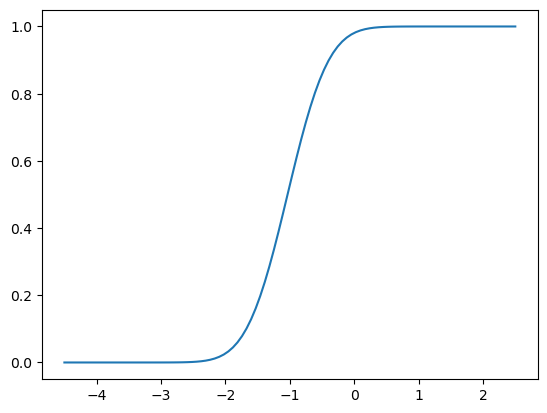

In [16]:
cdf_x = np.cumsum(Wx)
cdf_x = cdf_x / cdf_x[-1]

plt.plot(x, cdf_x)
plt.show()

inverse_cdf_x = interp1d(cdf_x, x, kind='cubic', fill_value='extrapolate')

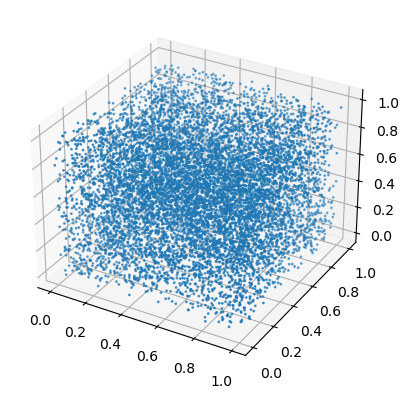

In [8]:
x_rand = np.random.uniform(0, 1, 10000)
y_rand = np.random.uniform(0, 1, 10000)
z_rand = np.random.uniform(0, 1, 10000)

# plot 3D scatter
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_rand, y_rand, z_rand, s=1)
plt.show()


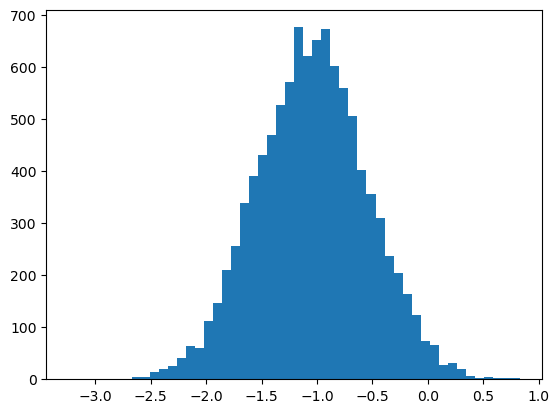

In [10]:
x_t = inverse_cdf_x(x_rand)

plt.hist(x_t, bins=50)
plt.show()

In [26]:
Wd = density_pdf(X, Y, Z, mu_x, mu_y, mu_z, sigma_x, sigma_y, sigma_z)
Wx = np.trapz(np.trapz(Wd, z), y)
cdf_x = np.cumsum(Wx)
cdf_x = cdf_x / cdf_x[-1]
inverse_cdf_x = interp1d(cdf_x, x, kind='cubic', fill_value='extrapolate')

xs, ys, zs = [], [], []
for i, (xx, yy, zz) in enumerate(zip(x_rand, y_rand, z_rand)):
    x_t = inverse_cdf_x(xx)
    Wxy = np.trapz(Wd, z)
    Y, Z = np.meshgrid(y, z)
    Wyz = density_pdf(x_t, Y, Z, mu_x, mu_y, mu_z, sigma_x, sigma_y, sigma_z)
    Wy = np.trapz(Wyz, z)
    cdf_y = np.cumsum(Wy)
    cdf_y = cdf_y / cdf_y[-1]
    inverse_cdf_y = interp1d(cdf_y, y, kind='cubic', fill_value='extrapolate')
    y_t = inverse_cdf_y(yy)
    Wz = density_pdf(x_t, y_t, z, mu_x, mu_y, mu_z, sigma_x, sigma_y, sigma_z)
    cdf_z = np.cumsum(Wz)
    cdf_z = cdf_z / cdf_z[-1]
    inverse_cdf_z = interp1d(cdf_z, z, kind='cubic', fill_value='extrapolate')
    z_t = inverse_cdf_z(zz)
    xs.append(x_t)
    ys.append(y_t)
    zs.append(z_t)
    if i % 100 == 0:
        print(i, end=' ')


0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 

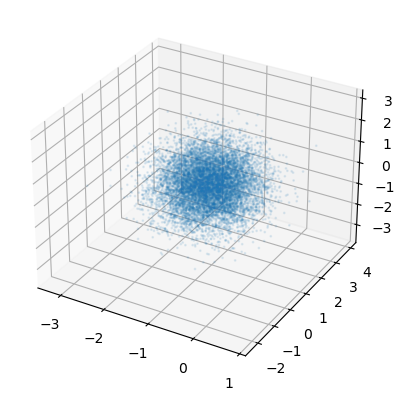

In [27]:
# plot 3D scatter
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, s=1, alpha=0.1)
plt.show()


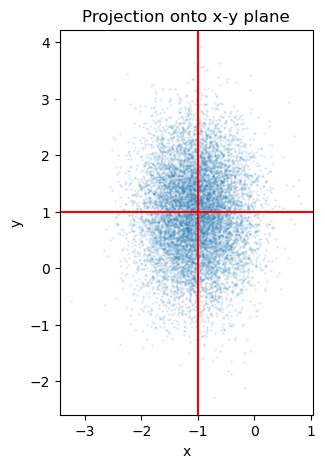

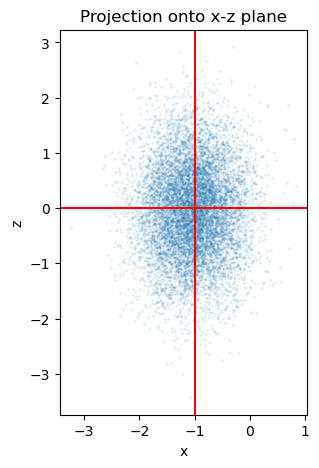

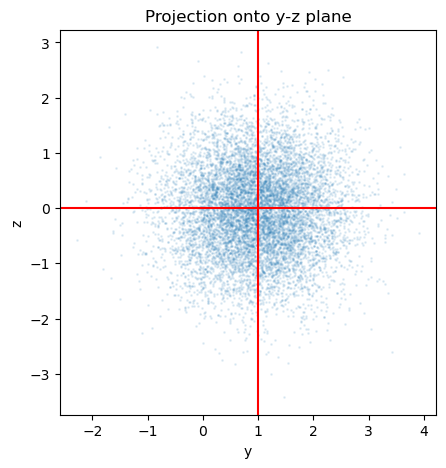

In [29]:
# plot projection onto x-y plane
plt.figure(figsize=(5,5))
plt.scatter(xs, ys, s=1, alpha=0.1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Projection onto x-y plane')
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(mu_x, color='r')
plt.axhline(mu_y, color='r')
plt.show()

# plot projection onto x-z plane
plt.figure(figsize=(5,5))
plt.scatter(xs, zs, s=1, alpha=0.1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Projection onto x-z plane')
plt.xlabel('x')
plt.ylabel('z')
plt.axvline(mu_x, color='r')
plt.axhline(mu_z, color='r')
plt.show()

# plot projection onto y-z plane
plt.figure(figsize=(5,5))
plt.scatter(ys, zs, s=1, alpha=0.1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Projection onto y-z plane')
plt.xlabel('y')
plt.ylabel('z')
plt.axvline(mu_y, color='r')
plt.axhline(mu_z, color='r')
plt.show()


Working!

# MCMC

## 1D

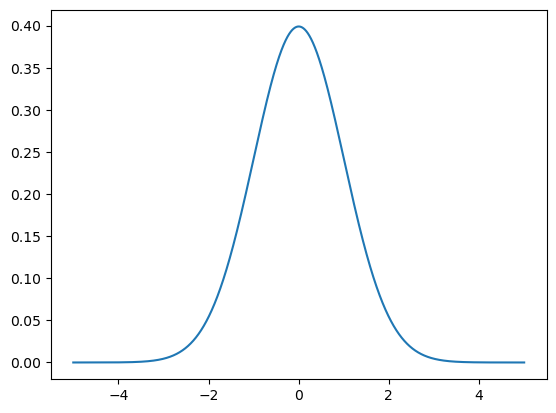

In [53]:
def density(x, mu, sigma):
    return norm.pdf(x, loc=mu, scale=sigma)

mu = 0
sigma = 1

x = np.linspace(-5, 5, 10000)
y = density(x, mu, sigma)

plt.plot(x, y)
plt.show()

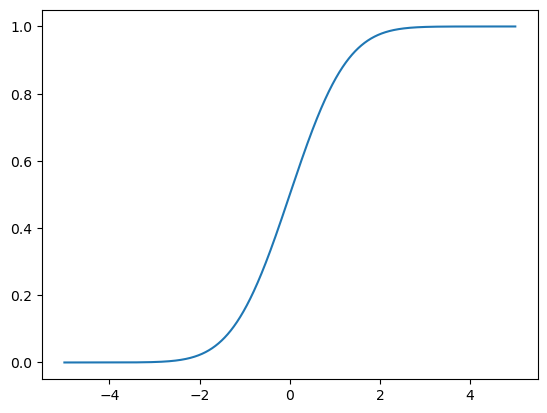

In [54]:
cdf_x = np.cumsum(y)
cdf_x = cdf_x / cdf_x[-1]
plt.plot(x, cdf_x)
plt.show()

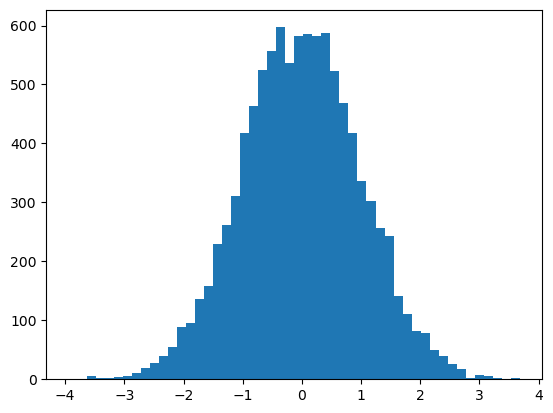

In [57]:
inverse_cdf_x = interp1d(cdf_x, x, kind='cubic', fill_value='extrapolate')

x_rand = np.random.uniform(0, 1, 10000)

x_t = inverse_cdf_x(x_rand)

plt.hist(x_t, bins=50)
plt.show()

In [56]:
from scipy.stats import uniform

def safe_log(x):
    return np.select([x > 0, x <= 0], [np.log(x), -np.inf])

# inhomoegenous Poisson process
def log_likelihood(x, **theta):
  def lambda_func(x, **theta):
    mu, sigma = theta['mu'], theta['sigma']
    return density(x, mu, sigma)
  lambda_data = lambda_func(x, **theta)
  log_lambda = np.sum(safe_log(lambda_data))
  xx = np.linspace(np.min(x), np.max(x), 1000)
  integral = np.trapz(lambda_func(xx, **theta), xx)
  return log_lambda - integral
    

# uniform prior
def log_prior(**pars):
  theta, loc, scale = pars['theta'], pars['loc'], pars['scale']
  uniform_args = dict(x=[], loc=[], scale=[])
  for t in ["mu", "sigma"]:
    uniform_args['x'].append(theta[t])
    uniform_args['loc'].append(loc[t])
    uniform_args['scale'].append(scale[t])
  val = np.sum(uniform.logpdf(**uniform_args))
  return val

theta_names = ['mu', 'sigma']

def log_posterior(x: np.ndarray, data: np.ndarray, priors: dict):
  theta = {t: x[i] for i, t in enumerate(theta_names)}
  pars = dict(theta=theta, **priors)
  log_prior_ = log_prior(**pars)
  if np.isinf(log_prior_):
    return -np.inf
  return log_prior_ + log_likelihood(data, **theta)

In [58]:
# test
log_likelihood(x, mu=mu, sigma=sigma)

-50865.38616488997

In [59]:
log_prior(theta=dict(mu=0, sigma=1), loc=dict(mu=-5, sigma=0), scale=dict(mu=10, sigma=5))

-3.9120230054281464

In [60]:
data=x_t
priors=dict(loc=dict(mu=-5, sigma=0), scale=dict(mu=10, sigma=5))
theta = np.array([0, 1])
log_posterior(theta, data, priors)

-14154.985818791862

In [61]:
ndim = 2
nwalkers = ndim*2+10

loc = dict(mu=-5, sigma=0)
scale = dict(mu=10, sigma=5)

mu_0 = np.random.uniform(loc['mu'], loc['mu']+scale['mu'], size=nwalkers)
sigma_0 = np.random.uniform(loc['sigma'], loc['sigma']+scale['sigma'], size=nwalkers)

p0 = np.array([mu_0, sigma_0]).T
p0

array([[-3.76207278,  4.28905886],
       [ 1.13365558,  3.15588484],
       [-2.64132133,  3.69426142],
       [-4.2081596 ,  3.47841137],
       [ 0.26322106,  1.39029536],
       [ 3.07903036,  3.57739573],
       [-4.38329675,  0.25311882],
       [-4.00313769,  4.60623703],
       [ 4.17497701,  0.46055009],
       [ 2.06040514,  3.48986957],
       [ 1.03672838,  4.83277275],
       [-3.95397735,  0.61045432],
       [-3.52645157,  3.2965834 ],
       [-4.52285144,  3.6746789 ]])

In [62]:
def plot_chain(sampler, labels):
  fig, axes = plt.subplots(len(labels), figsize=(10, 7), sharex=True)
  samples = sampler.get_chain()
  for i in range(len(labels)):
      ax = axes[i]
      ax.plot(samples[:, :, i], "k", alpha=0.3)
      ax.set_xlim(0, len(samples))
      ax.set_ylabel(labels[i])
      ax.yaxis.set_label_coords(-0.1, 0.5)
  axes[-1].set_xlabel("step number")

100%|██████████| 200/200 [00:05<00:00, 37.41it/s]


Multiprocessing took 5.4 seconds


100%|██████████| 5000/5000 [01:50<00:00, 45.39it/s]


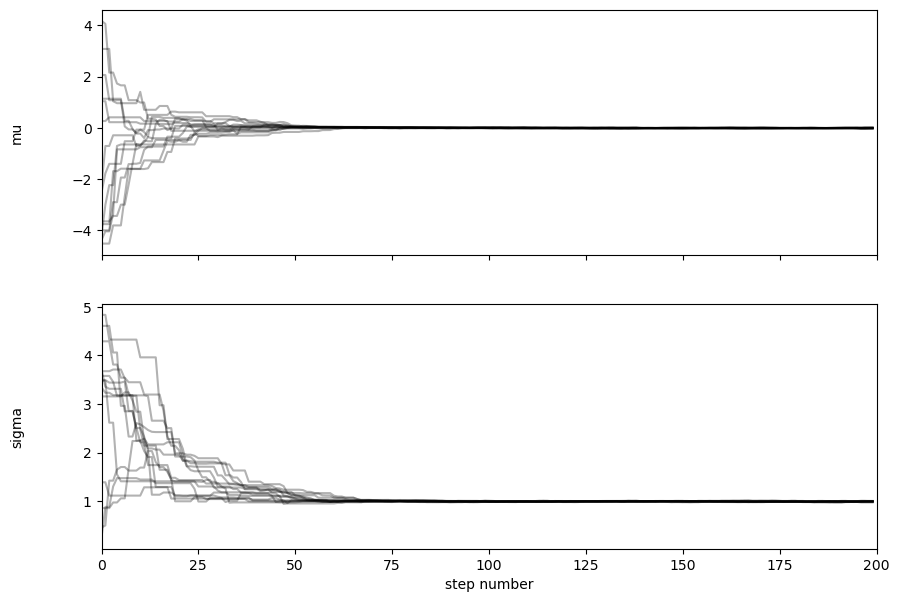

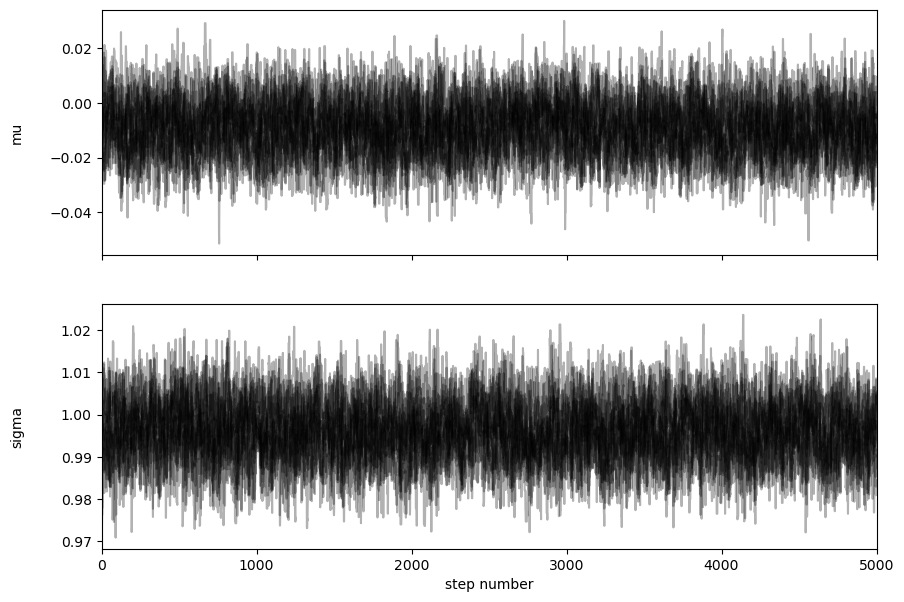

In [63]:
import os
from multiprocessing import Pool
import time
import emcee

os.environ["OMP_NUM_THREADS"] = "8"
sampler_ = 0
labels = ["mu", "sigma"]
with Pool() as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[data, priors])
    start = time.time()
    state = sampler.run_mcmc(p0, 200, progress=True)
    end = time.time()
    multi_time = end - start
    print("Multiprocessing took {0:.1f} seconds".format(multi_time))
    plot_chain(sampler, labels)
    sampler.reset()
    sampler.run_mcmc(state, 5000, progress=True)
    plot_chain(sampler, labels)
    sampler_ = sampler

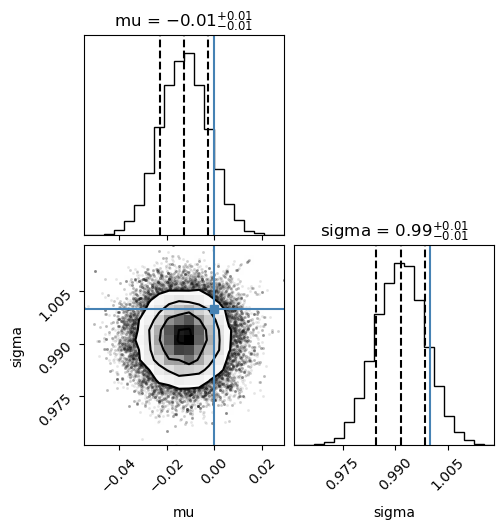

In [52]:
import corner

flat_samples = sampler.get_chain(flat=True)
fig = corner.corner(
    flat_samples, labels=labels,
    truths=[mu, sigma],
    quantiles=[0.16, 0.5, 0.84],
    show_titles=True, title_kwargs={"fontsize": 12},
)